In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite").connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23',)

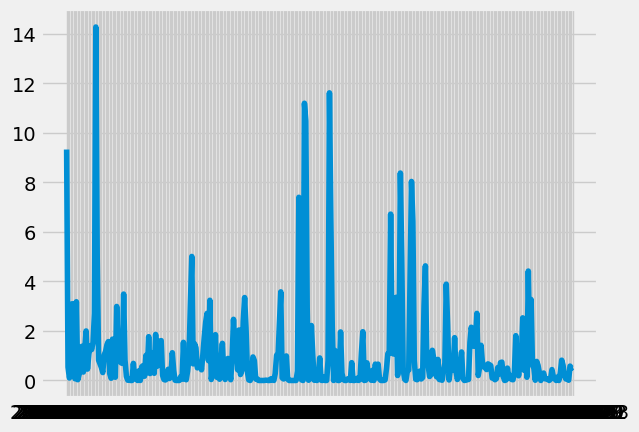

In [41]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = dt.datetime(2017, 8, 23)


# Calculate the date one year from the last date in data set.
earliest_date = dt.datetime(2016, 8, 23)


# Perform a query to retrieve the data and precipitation scores
last_12 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date < latest_date).filter(Measurement.date > earliest_date).all()
# last_12
# for x in last_12:
#     print(x.prcp)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame({"Date": [day.date for day in last_12], "Precipitation": [day.prcp for day in last_12]})
prcp_df.set_index("Date")
prcp_df_grouped = prcp_df.groupby(["Date"]).sum()
prcp_df_grouped
prcp_df = pd.DataFrame(prcp_df_grouped)
# Sort the dataframe by date
prcp_df.sort_index(inplace=True)
bar_labels = prcp_df.index
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(prcp_df.index, prcp_df["Precipitation"])
plt.xlabel = "Date"
plt.ylabel = "Precipitation"
plt.show()

In [42]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000


# Exploratory Station Analysis

In [43]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [46]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.id)).all()

[(9,)]

In [58]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [61]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
summary = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
summary

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

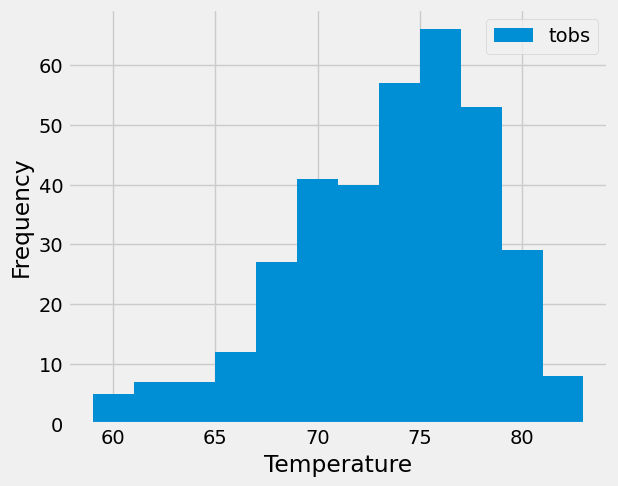

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_USC00519281 = session.query(Measurement.date, Measurement.temp).filter(Measurement.station == "USC00519281").filter(Measurement.date < latest_date).filter(Measurement.date > earliest_date).all()
temp_df = pd.DataFrame({"Date": [day.date for day in last_12_USC00519281], "Temperature": [day.temp for day in last_12_USC00519281]})
temp_df.set_index("Date")
temp_df_grouped = temp_df.groupby(["Date"]).sum()
temp_df = pd.DataFrame(ptemp_df_grouped)
# Sort the dataframe by date
temp_df.sort_index(inplace=True)
bar_labels = temp_df.index
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(temp_df.index, temp_df["Temperature"])
plt.xlabel = "Date"
plt.ylabel = "Precipitation"
plt.show()

# Close Session

In [16]:
# Close Session
session.close()